**Importing Relevent libraries**

In [1]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
from keras.datasets import mnist

**Loading the MNIST Dataset**

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


**Plotting the data**

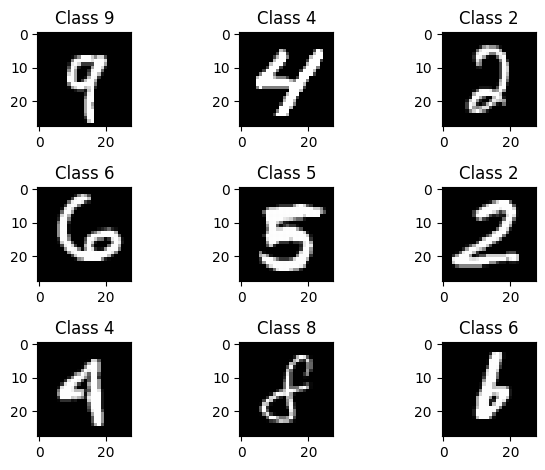

In [6]:
for i in range(9):
    plt.subplot(3,3, i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap= 'gray', interpolation = 'none')
    plt.title("Class {}".format(y_train[num]))
plt.tight_layout()

**Data Preprocessing**

In [7]:
X_train = X_train.reshape(60000, 784)   #Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector 
X_test = X_test.reshape(10000, 784) 

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train/=255
X_test/=255                            #normalize these values by dividing them by 255(Pixel values range from 0 to 255)

In [8]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [9]:
tf.keras.utils.to_categorical(y_train, 10)
tf.keras.utils.to_categorical(y_test, 10)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Building the Neural Network**

In [10]:
model = Sequential([tf.keras.Input(shape=(784,)),
        Dense(512, activation='relu', name='L1',),
        Dense(512, activation='relu', name='L2'),
        Dense(10, activation='softmax', name='L3')])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
[layer1, layer2, layer3] = model.layers

In [13]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 512), b1 shape = (512,)
W2 shape = (512, 512), b2 shape = (512,)
W3 shape = (512, 10), b3 shape = (10,)


In [14]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [15]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [16]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9053 - loss: 0.3101
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9750 - loss: 0.0793
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9824 - loss: 0.0525
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9882 - loss: 0.0363
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9902 - loss: 0.0293
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9921 - loss: 0.0247
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9927 - loss: 0.0232
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9944 - loss: 0.0181
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9959 - loss: 0.0143
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9948 - loss: 0.0163


**Evaluating the model**

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy', score[1])

Test score: 0.09712851047515869
Test accuracy 0.9801999926567078


In [18]:
score = model.evaluate(X_train, y_train, verbose=0)
print('train score:', score[0])
print('train accuracy', score[1])

train score: 0.020762693136930466
train accuracy 0.9940833449363708
